In [881]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import skimage.morphology as morphology
from sklearn.cluster import KMeans

image_folder = './'

In [882]:
def import_image_folder(img_folder):
    images = glob.glob(img_folder + "*.jpg")
    return images

def get_skin(input_image, min_h=0, max_h=50):
    hsi_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2HLS)
    output_shape = list(hsi_image.shape[0:2])
    empty_image = np.zeros(tuple(output_shape), dtype='uint16')
    for row in range(0,hsi_image.shape[0]):
        for col in range(0,hsi_image.shape[1]):
            if hsi_image[row,col,0] > min_h and hsi_image[row,col,0] < max_h:
                empty_image[row,col] = 1

    #restored_img = cv2.cvtColor(empty_image, cv2.COLOR_HLS2RGB)
    return empty_image

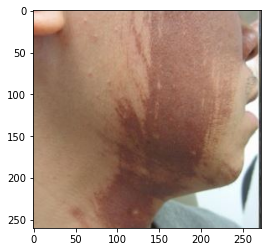

In [883]:
img = cv2.imread('./BurnDemo3.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
tmp_hsi_image = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2HLS)
plt.imshow(RGB_img)

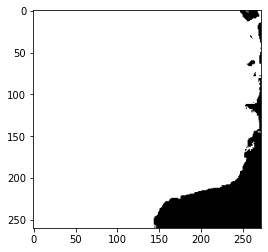

In [884]:
plt.imshow(get_skin(RGB_img, max_h=25), cmap='gray')

In [885]:
image_list = import_image_folder(image_folder)

In [886]:
converted_images = []
og_images = []
for image_name in image_list:
    img = cv2.imread(image_name)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    og_images.append(RGB_img)
    converted_images.append(get_skin(RGB_img, max_h=25))


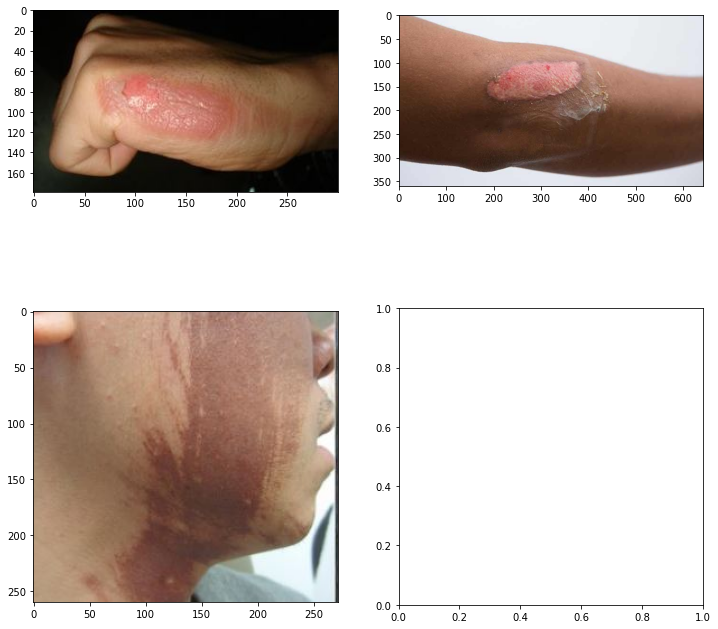

In [887]:
#originals
_, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(og_images, axs):
    ax.imshow(img)
plt.show()

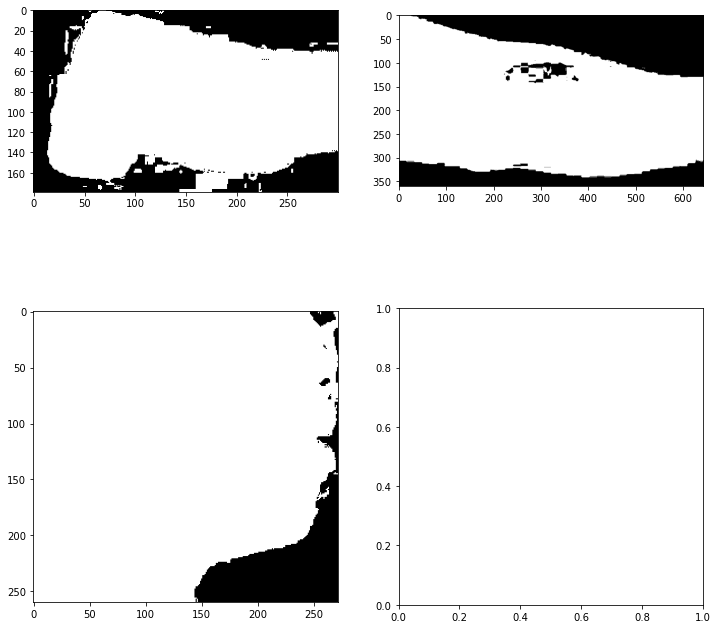

In [888]:
#skin
_, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(converted_images, axs):
    ax.imshow(img, cmap='gray')
plt.show()

In [889]:
# def erode_and_dilate(image):
#     # Erosion and dilation to remove artifacts and fill
#     img_erosion = cv2.erode(image,
#                             np.ones((5,5), np.uint8), iterations=3)
#     img_dilation = cv2.dilate(img_erosion, np.ones((7,7), np.uint8), iterations=1)
#
#     return img_dilation
#     #plt.imshow(img_dilation)

def erode_and_dilate(img):
    img_erosion = cv2.erode(img,
                            np.ones((5,5), np.uint8), iterations=4)
    blurred = cv2.GaussianBlur(img_erosion,(7,7),cv2.BORDER_DEFAULT).astype('uint8')

    img_dilation = cv2.dilate(blurred, np.ones((5,5), np.uint8), iterations=4)
    (thresh, im_bw) = cv2.threshold(img_dilation, 125, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    #(cnts, _) = cv2.findContours(im_bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    (cnts, _) = cv2.findContours(im_bw.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros(image.shape)
    if len(cnts) > 0:
        c = max(cnts, key = cv2.contourArea)
        #cv2.drawContours(mask, cnts, -1, (255,255,255), 3)
        cv2.fillPoly(mask, pts =[c], color=(1))
    return mask

In [890]:
for index, image in enumerate(converted_images):
    print(image.shape)
    converted_images[index] = erode_and_dilate(image)


(179, 300)
(361, 642)
(260, 272)


(179, 300)
(361, 642)
(260, 272)


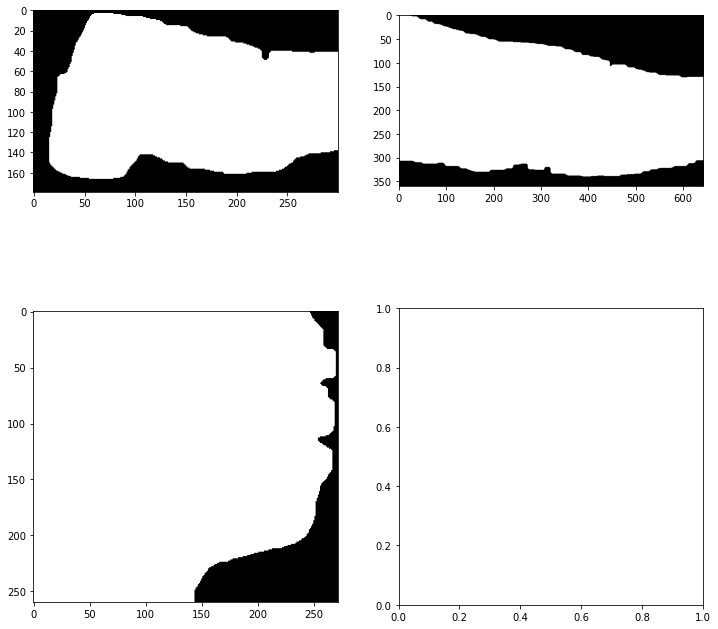

In [891]:
#skin
_, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(converted_images, axs):
    print(img.shape)
    ax.imshow(img, cmap='gray')
plt.show()